In [1]:
import matplotlib.pyplot as plt
import numpy as np
import data_manager as dm
from sklearn import linear_model
from sklearn.metrics import r2_score

In [2]:
plt.style.use('fivethirtyeight')

In [3]:
df = dm.load_data()
df = df.drop(columns=["Unnamed: 0"])
df.head()

porosity  characteristical_pore_length  sample_id  MEAN_pore_row_length  \
0       0.1                           5.0        0.0              9.495826   
1       0.1                          10.0        0.0             18.857831   
2       0.1                          15.0        0.0             22.431414   
3       0.1                          20.0        0.0             33.434018   
4       0.1                          25.0        0.0             45.289515   

   median_pore_row_length  MEAN_material_row_length  \
0                     8.0                 78.009126   
1                    17.0                125.366157   
2                    22.0                164.154185   
3                    30.0                187.350759   
4                    44.0                189.526316   

   median_material_row_length  sum_medians   sum_MEANS  
0                        57.0         65.0   87.504952  
1                        90.0        107.0  144.223989  
2                       151.5        173.5  186.585599  
3                       187.0        217.0  220.784776  
4                       211.0        255.0  234.815831

# Смотрим, как у нас в принципе выгледят все колонки

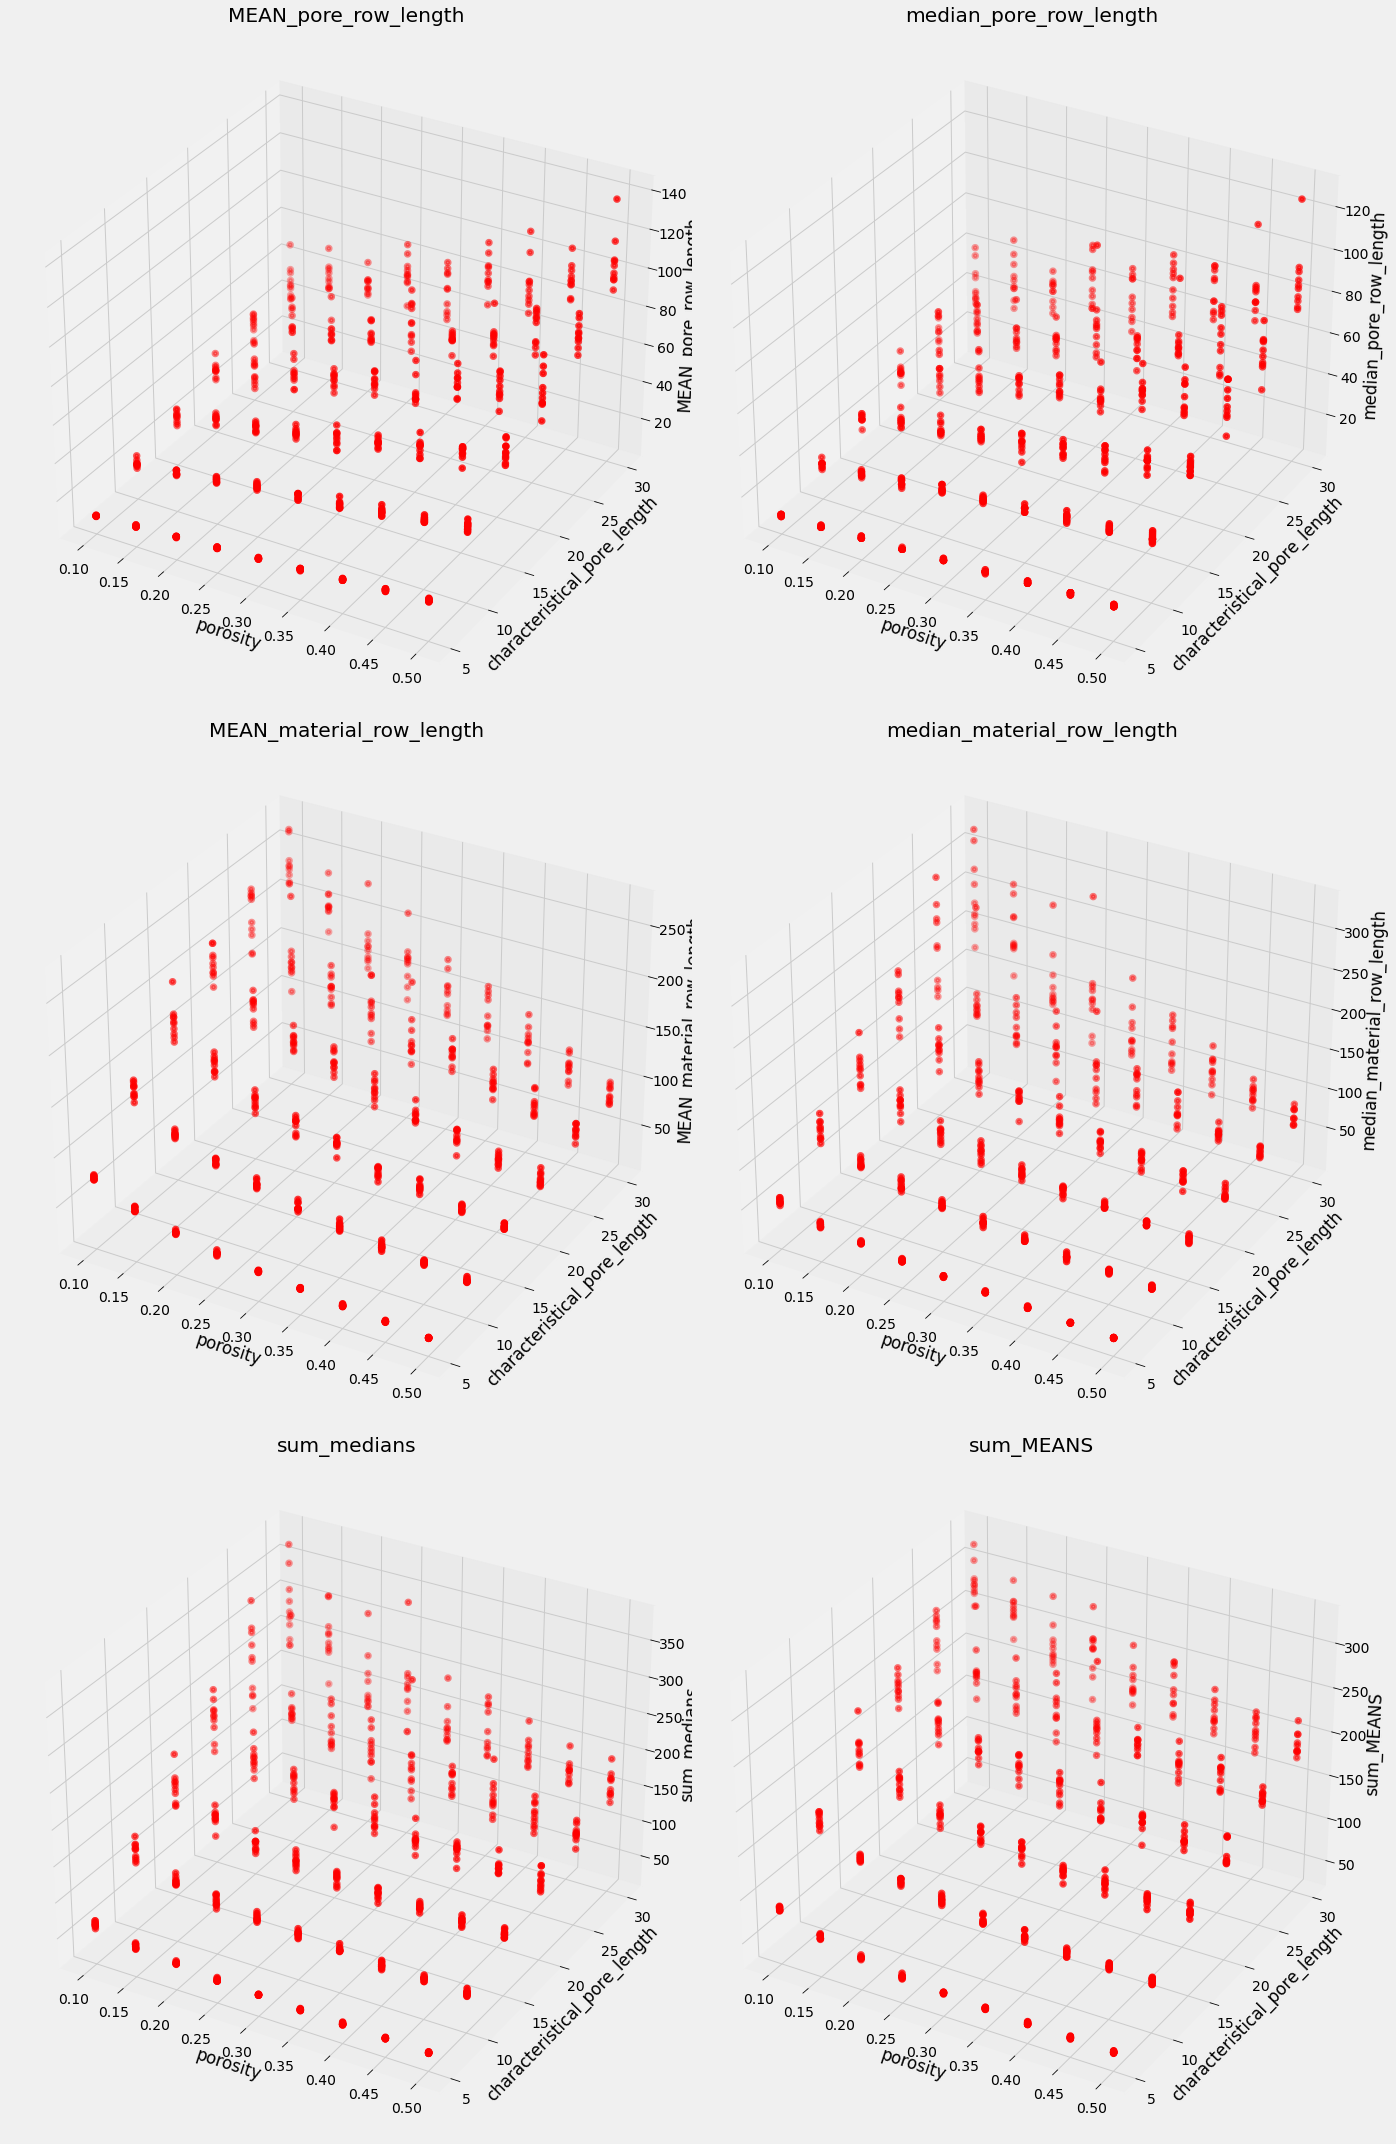

In [4]:
z_labels = df.columns[3:]
ncols = 2
nrows = len(z_labels) // 2
fig = plt.figure(figsize=(10*ncols, 10*nrows))

axes = [fig.add_subplot(int(f"{nrows}{ncols}{index+1}"), projection='3d') for index, _ in enumerate(z_labels)]

for z_label, ax in zip(z_labels, axes):
    x_label = "porosity"
    y_label = "characteristical_pore_length" 

    ax.scatter(df[[x_label]], df[[y_label]], df[[z_label]], color='red', linewidth=3)

    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_zlabel(z_label)
    ax.set_title(z_label)
plt.tight_layout()

# Оставим только средние

In [5]:
df_mean = df.groupby(["porosity", "characteristical_pore_length"]).mean().reset_index()
df_mean

porosity  characteristical_pore_length  sample_id  MEAN_pore_row_length  \
0       0.10                           5.0        4.5              9.546396   
1       0.10                          10.0        4.5             18.929489   
2       0.10                          15.0        4.5             26.080371   
3       0.10                          20.0        4.5             34.083294   
4       0.10                          25.0        4.5             41.406413   
5       0.10                          30.0        4.5             48.302128   
6       0.15                           5.0        4.5             10.865406   
7       0.15                          10.0        4.5             20.643904   
8       0.15                          15.0        4.5             31.393293   
9       0.15                          20.0        4.5             39.842032   
10      0.15                          25.0        4.5             49.773436   
11      0.15                          30.0        4.5             56.979489   
12      0.20                           5.0        4.5             12.151544   
13      0.20                          10.0        4.5             23.465003   
14      0.20                          15.0        4.5             33.347781   
15      0.20                          20.0        4.5             44.043418   
16      0.20                          25.0        4.5             50.828859   
17      0.20                          30.0        4.5             59.107498   
18      0.25                           5.0        4.5             13.239566   
19      0.25                          10.0        4.5             26.936341   
20      0.25                          15.0        4.5             36.977744   
21      0.25                          20.0        4.5             47.530994   
22      0.25                          25.0        4.5             55.292012   
23      0.25                          30.0        4.5             70.736929   
24      0.30                           5.0        4.5             14.599952   
25      0.30                          10.0        4.5             28.337553   
26      0.30                          15.0        4.5             40.163061   
27      0.30                          20.0        4.5             53.052324   
28      0.30                          25.0        4.5             67.367906   
29      0.30                          30.0        4.5             67.305587   
30      0.35                           5.0        4.5             15.995683   
31      0.35                          10.0        4.5             30.672809   
32      0.35                          15.0        4.5             44.818950   
33      0.35                          20.0        4.5             53.610336   
34      0.35                          25.0        4.5             64.229301   
35      0.35                          30.0        4.5             82.262584   
36      0.40                           5.0        4.5             17.681681   
37      0.40                          10.0        4.5             33.824306   
38      0.40                          15.0        4.5             48.599501   
39      0.40                          20.0        4.5             64.378506   
40      0.40                          25.0        4.5             71.778425   
41      0.40                          30.0        4.5             82.914440   
42      0.45                           5.0        4.5             19.376007   
43      0.45                          10.0        4.5             36.408757   
44      0.45                          15.0        4.5             52.910466   
45      0.45                          20.0        4.5             68.484062   
46      0.45                          25.0        4.5             82.433803   
47      0.45                          30.0        4.5             91.222549   
48      0.50                           5.0        4.5             21.133087   
49      0.50                          10.0        4.5 

In [6]:
df_mean.shape

(54, 9)

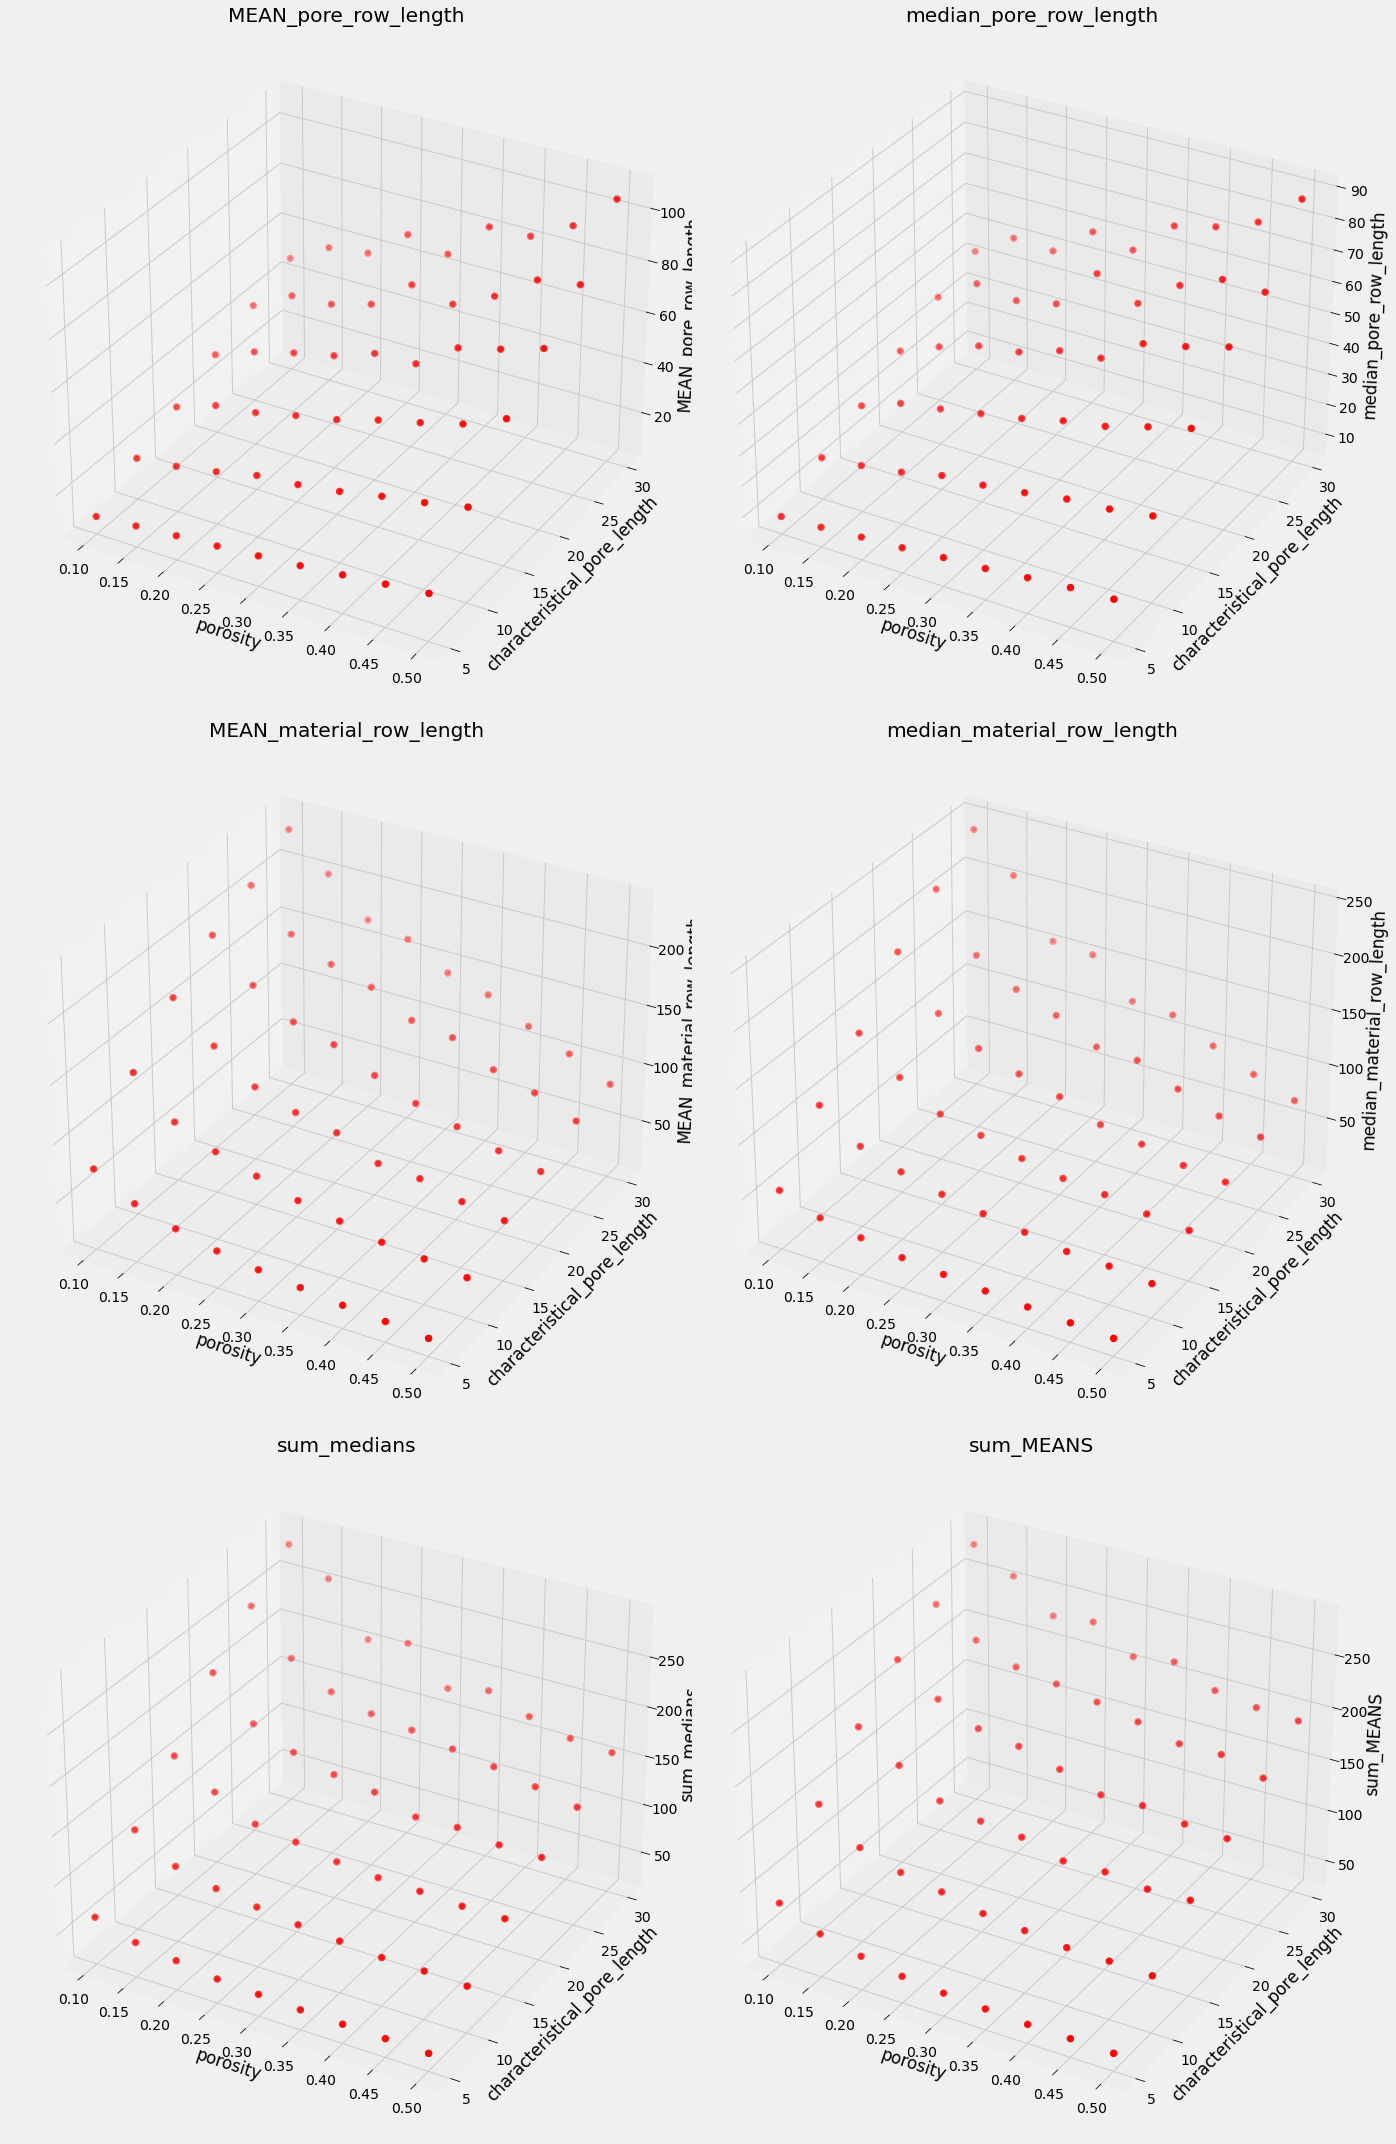

In [7]:
z_labels = df_mean.columns[3:]
ncols = 2
nrows = len(z_labels) // 2
fig = plt.figure(figsize=(10*ncols, 10*nrows))

axes = [fig.add_subplot(int(f"{nrows}{ncols}{index+1}"), projection='3d') for index, _ in enumerate(z_labels)]

for z_label, ax in zip(z_labels, axes):
    x_label = "porosity"
    y_label = "characteristical_pore_length" 

    ax.scatter(df_mean[[x_label]], df_mean[[y_label]], df_mean[[z_label]], color='red', linewidth=3)

    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_zlabel(z_label)
    ax.set_title(z_label)
plt.tight_layout()

# Попробуем регрессию плоскостью:

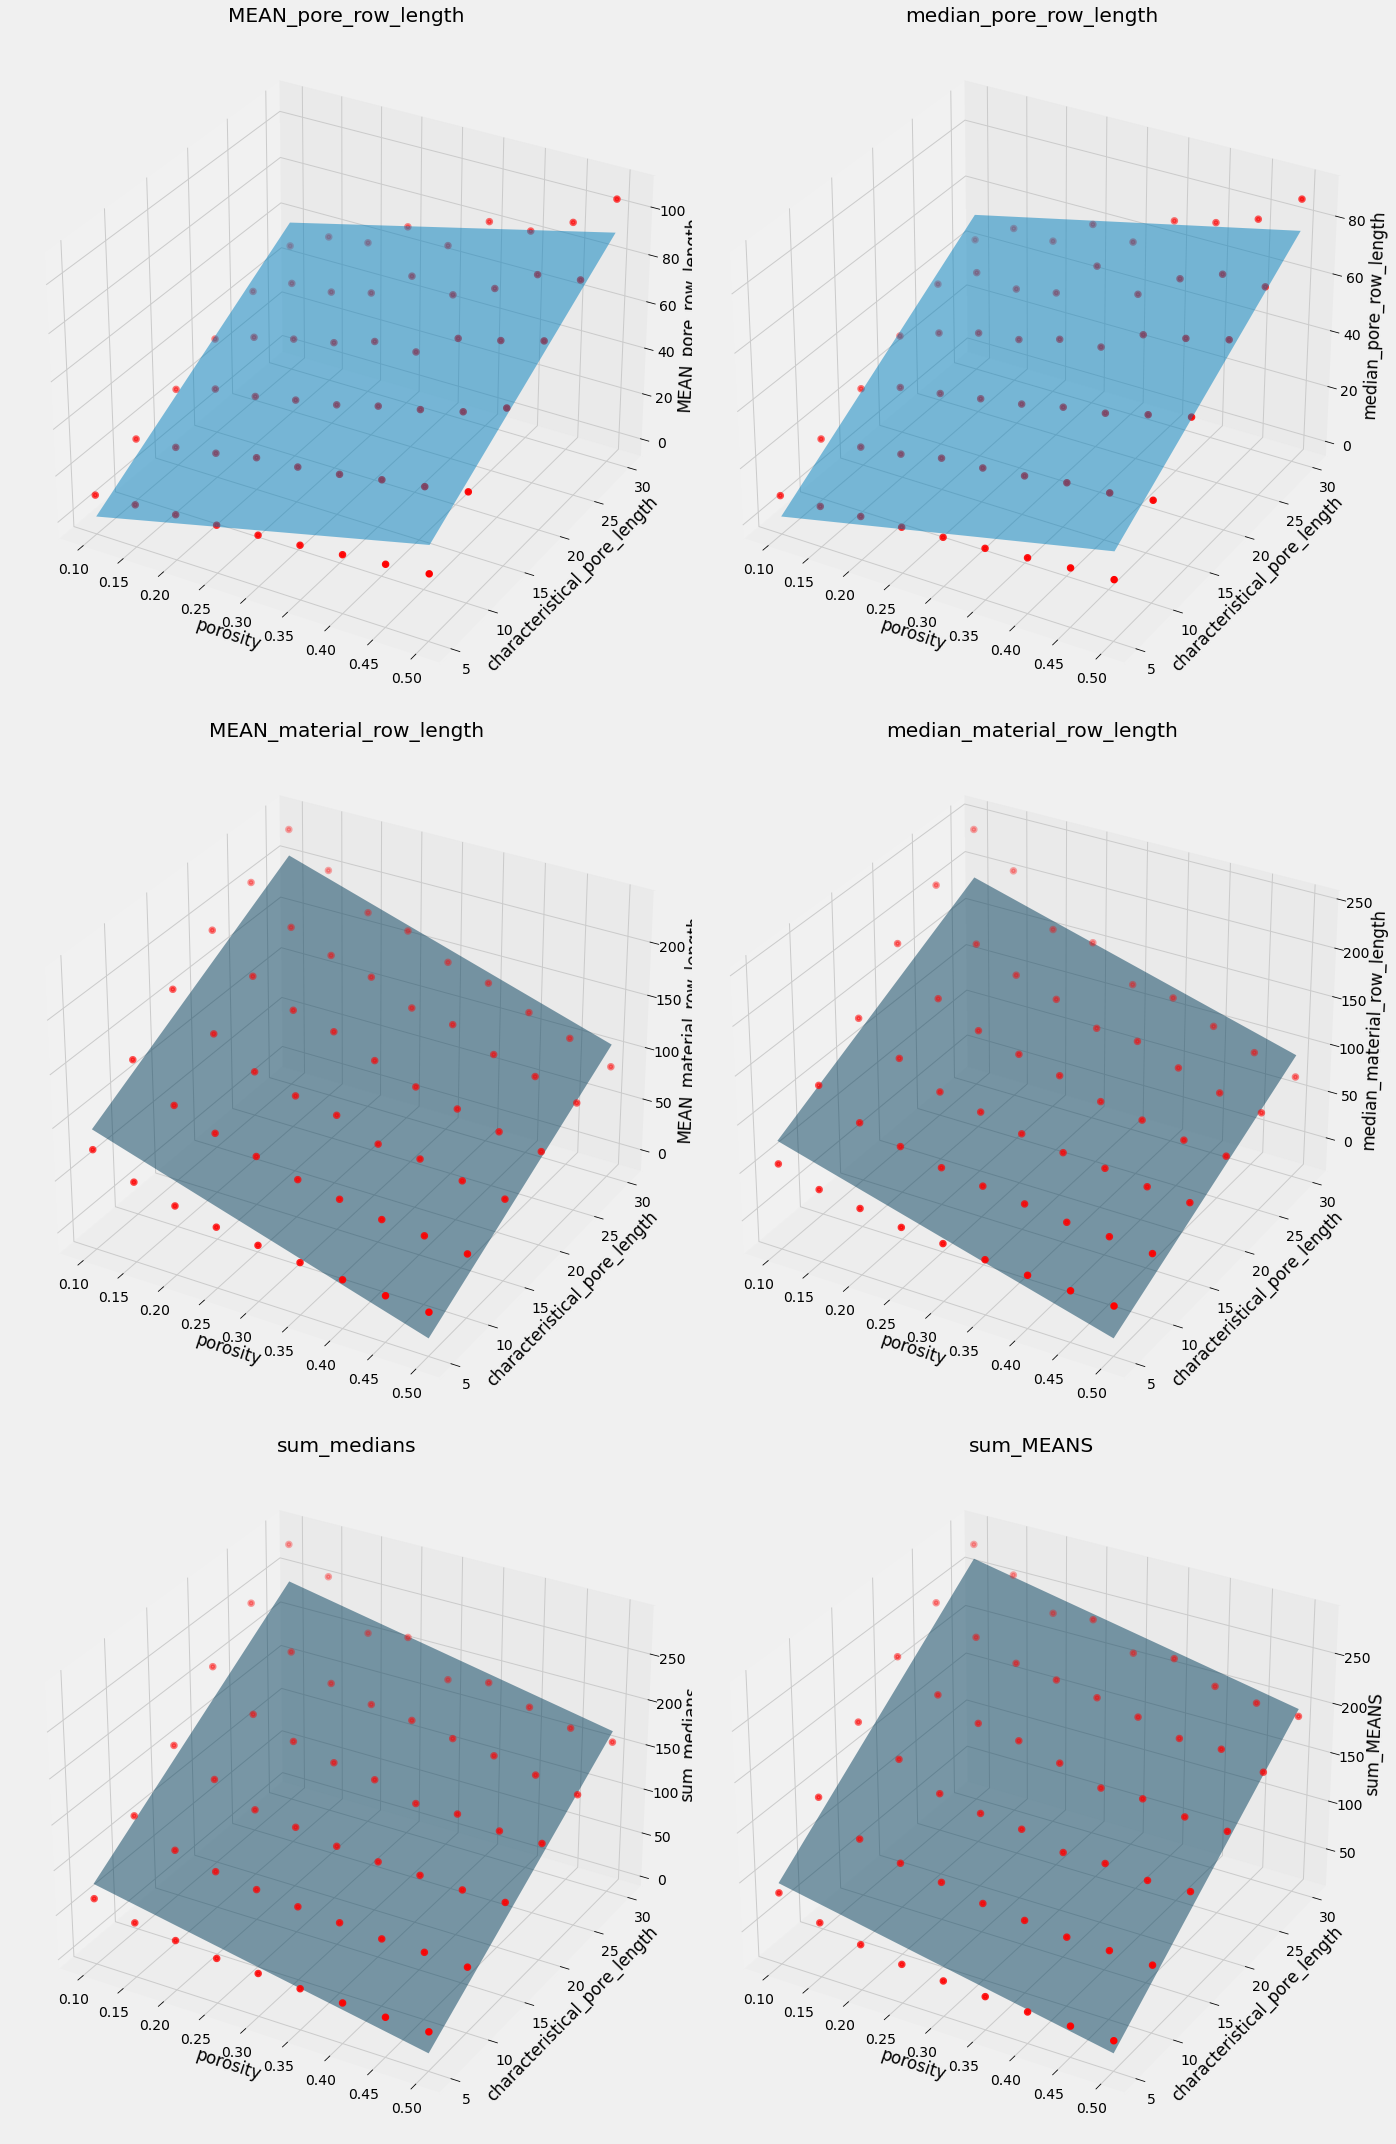

In [8]:
z_labels = df_mean.columns[3:]
ncols = 2
nrows = len(z_labels) // 2
fig = plt.figure(figsize=(10*ncols, 10*nrows))

axes = [fig.add_subplot(int(f"{nrows}{ncols}{index+1}"), projection='3d') for index, _ in enumerate(z_labels)]

for z_label, ax in zip(z_labels, axes):
    x_label = "porosity"
    y_label = "characteristical_pore_length"

    ax.scatter(df_mean[[x_label]], df_mean[[y_label]], df_mean[[z_label]], color='red', linewidth=3)

    X_train = np.transpose([df_mean[[x_label]].to_numpy(), df_mean[[y_label]].to_numpy()])[0]
    y_train = df_mean[[z_label]].to_numpy()
    regr = linear_model.LinearRegression()
    regr.fit(X_train, y_train)

    min_x, max_x = df_mean[[x_label]].min(), df_mean[[x_label]].max()
    min_y, max_y = df_mean[[y_label]].min(), df_mean[[y_label]].max()

    X, Y = np.meshgrid([min_x, max_x], [min_y, max_y])
    (X_coef, Y_coef), Z0 = regr.coef_[0], regr.intercept_
    ax.plot_surface(X, Y,
                    X_coef*X + Y_coef * Y + Z0,
                    alpha=.5)

    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_zlabel(z_label)
    ax.set_title(z_label)
plt.tight_layout()

# Попробуем регрессию множеством прямых с разным наклоном

Рассмотрим только среднее по порам (MEAN_pore_row_length) т.к. там график максимально линеен.

Построим сечения 3d графика

In [9]:
df_mean = df_mean.drop(columns=['sample_id'])

In [10]:
df_mean_filtered = df_mean.filter(['porosity', 'characteristical_pore_length', 'MEAN_pore_row_length'])
df_mean_filtered.head()

porosity  characteristical_pore_length  MEAN_pore_row_length
0       0.1                           5.0              9.546396
1       0.1                          10.0             18.929489
2       0.1                          15.0             26.080371
3       0.1                          20.0             34.083294
4       0.1                          25.0             41.406413

In [11]:
df_mean_filtered.porosity.unique()

array([0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ])

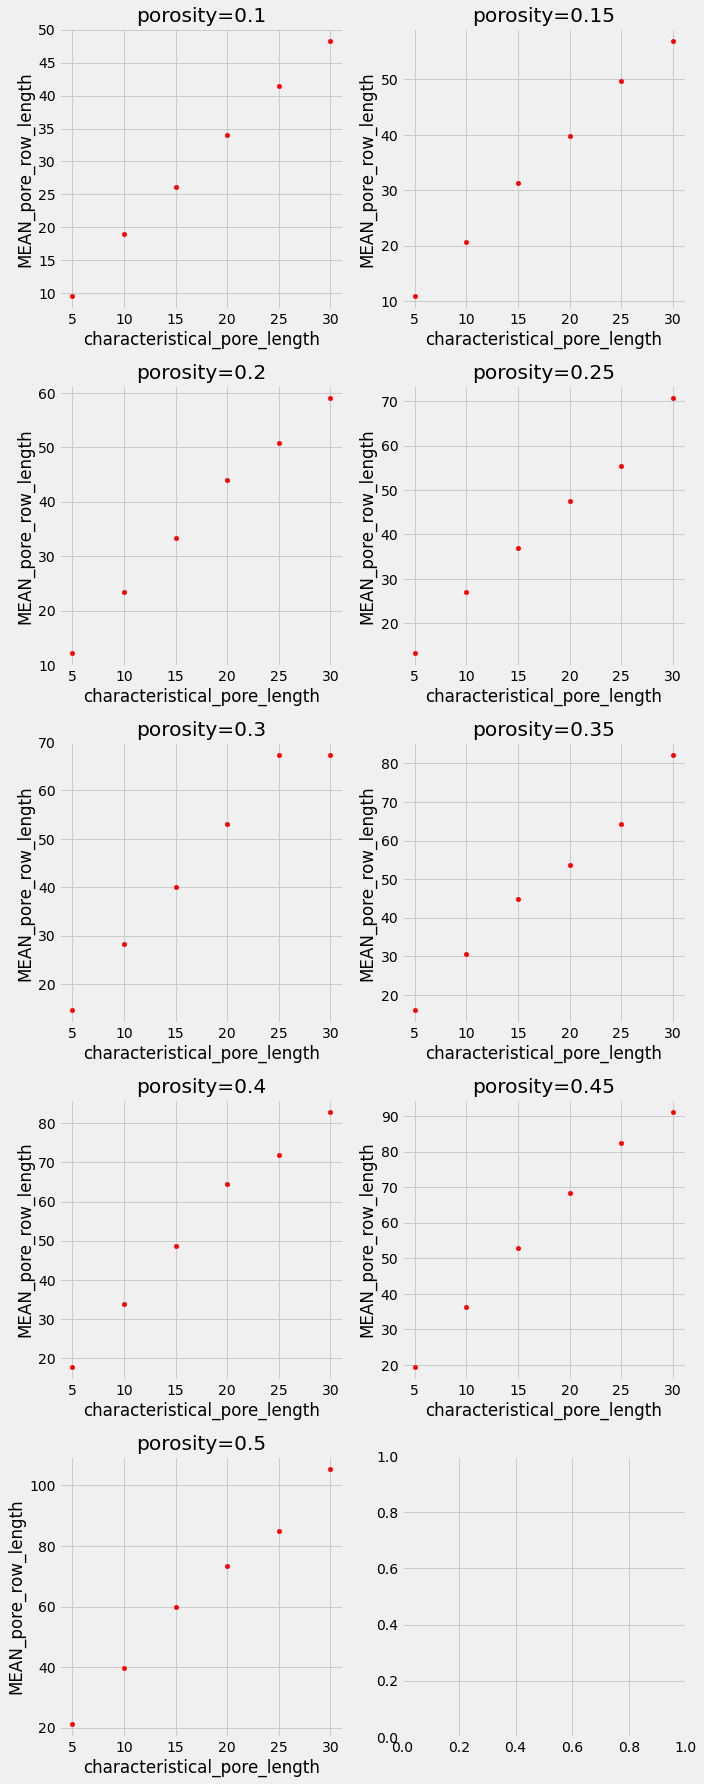

In [12]:
ncols = 2
nrows = np.ceil(df_mean_filtered.porosity.nunique() / ncols).astype(int)
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(5*ncols, 5*nrows))
axes = axes.flatten()
porosities = df_mean_filtered.porosity.unique()

for ax, p in zip(axes, porosities):
    df_mean_filtered[df_mean_filtered.porosity==p].plot(kind='scatter',
                                                        x='characteristical_pore_length',
                                                        y='MEAN_pore_row_length',
                                                        color="red",
                                                        ax=ax)
    ax.set_title(f"porosity={p}")

plt.tight_layout()

Все вроде отлично, все ложится на прямую. Регрессируем!

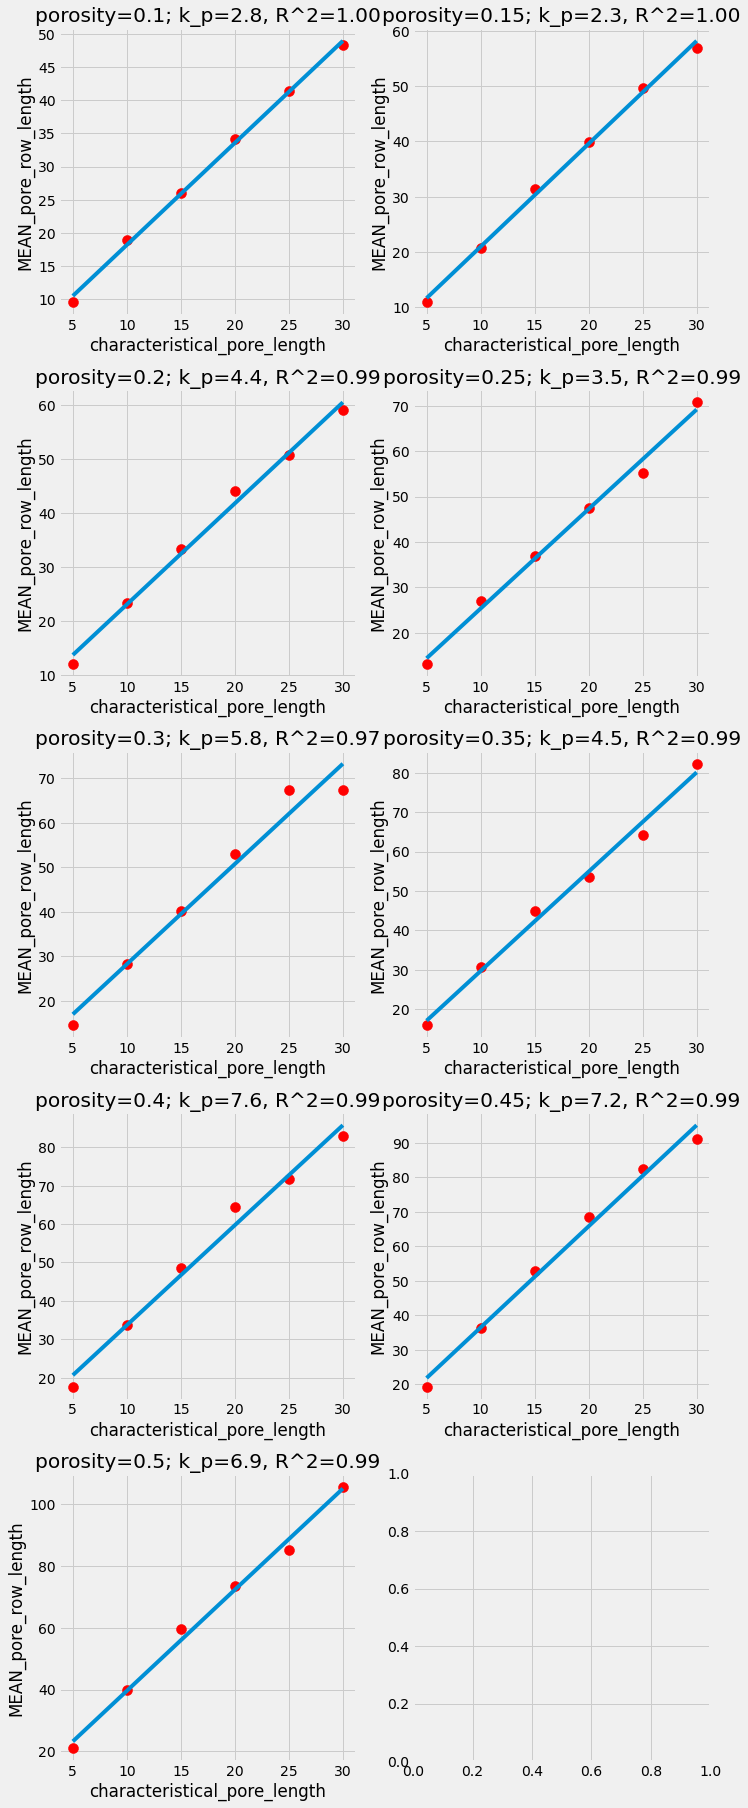

In [13]:
def get_linear_regression_func(x, y):
    x, y = np.asarray(x).reshape(-1, 1), np.asarray(y).reshape(-1, 1)
    x_edge_values = np.asarray([x[0], x[-1]])
    regr = linear_model.LinearRegression()
    regr.fit(x, y)
    k, y0 = regr.coef_, regr.intercept_ #y = y0+kx

    r2 = r2_score(y, regr.predict(x))
    return float(y0), float(k[0]), x_edge_values, y0 + k[0]*x_edge_values, r2


ncols = 2
nrows = np.ceil(df_mean_filtered.porosity.nunique() / ncols).astype(int)
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(5*ncols, 5*nrows), constrained_layout=True)
axes = axes.flatten()
porosities = df_mean_filtered.porosity.unique()

k_p_values, y0_p_values = [], []

for ax, p in zip(axes, porosities):
    cpl = df_mean_filtered[df_mean_filtered.porosity==p].characteristical_pore_length.to_numpy()
    Mprl = df_mean_filtered[df_mean_filtered.porosity==p].MEAN_pore_row_length.to_numpy()
    
    k_p, y0_p, x_values, y_values, r2 = get_linear_regression_func(cpl, Mprl)

    x_values = np.asarray([cpl[0], cpl[-1]])
    ax.plot(x_values, y_values)
    ax.scatter(x=cpl, y=Mprl, color="red", s=100)
    ax.set_title(f"porosity={p}; k_p={k_p:.1f}, R^2={r2:.2f}")

    ax.set_xlabel('characteristical_pore_length')
    ax.set_ylabel("MEAN_pore_row_length")

    k_p_values.append(k_p), y0_p_values.append(y0_p)


Теперь для каждой прямой с спрошлого графика возьмем тангенс наклона и интерсепт. Посмотрим, как они зависят от пористости 

Text(0.5, 1.0, 'R^2=0.97')

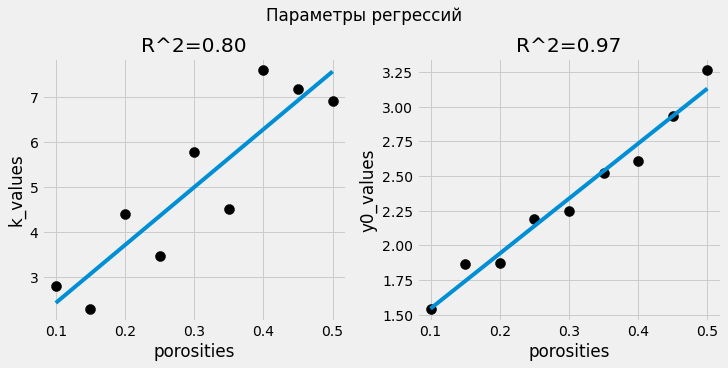

In [14]:

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(5*2, 5), constrained_layout=True)
fig.suptitle("Параметры регрессий")

axes[0].scatter(x=porosities, y=k_p_values, color="black", s=100)
Y0_k, K0_k, x_values, y_values, r2 = get_linear_regression_func(porosities, k_p_values)
axes[0].plot(x_values, y_values)
axes[0].set_xlabel('porosities')
axes[0].set_ylabel("k_values")
axes[0].set_title(f"R^2={r2:.2f}")

axes[1].scatter(x=porosities, y=y0_p_values, color="black", s=100)
Y0_y0, K0_y0, x_values, y_values, r2 = get_linear_regression_func(porosities, y0_p_values)
axes[1].plot(x_values, y_values)
axes[1].set_xlabel('porosities')
axes[1].set_ylabel("y0_values")
axes[1].set_title(f"R^2={r2:.2f}")

Из-за плохой предсказуемости рафика k, данного типа регрессия будет работь не корректно
Тем не менее, обратную задачу можно решить для конкретного типа пористости по следующему алгоритму

1. Определяем пористость и MEAN_pore_row_length у образца;
2. Либо / либо:
    1. генерим образцы данной пористости и строим регрессию как выше. Точный вариант.
    2. Берем данные из таблицы, которую дополняем до 100-ых долей пористости. Так называемые, сохраненные веса. Таблицу генерить на колабе. Быстрый вариант.

3. Из регрессии определяем MEAN_pore_row_length

# Решаем обратную задачу через пункт 2.1

In [15]:
import phantom_generator as pg
import statistics_calc as sc

In [16]:
def get_characteristical_pore_length(porosity, MEAN_pore_row_length_input, shape=[1000,1000]):
    characteristical_pore_lengths = [5, 10, 15, 20, 25, 30]
    sample_count = 10

    MEAN_pore_row_length_train_values = []
    for characteristical_pore_length in characteristical_pore_lengths:
        Mprl_for_cpl = []
        for sample_id in range(sample_count):
            phantom = pg.gen_phantom(shape, porosity, characteristical_pore_length)
            stat_zeros, stat_ones = sc.get_row_statistics(phantom, row_numbers="all", axis="both")

            MEAN_pore_row_length = np.mean(stat_zeros)
            Mprl_for_cpl.append(MEAN_pore_row_length)
        MEAN_pore_row_length_train_values.append(np.mean(Mprl_for_cpl))

    k, y0, *_ = get_linear_regression_func(characteristical_pore_lengths, MEAN_pore_row_length_train_values)

    characteristical_pore_length = (MEAN_pore_row_length_input - y0) / k 
    return characteristical_pore_length



In [17]:
devs = []
for indx in range(10):
    porosity, characteristical_pore_length, MEAN_pore_row_length = df_mean_filtered.to_numpy()[indx]
    cpl_predicted = get_characteristical_pore_length(porosity, MEAN_pore_row_length)
    dev = abs(characteristical_pore_length - cpl_predicted) / characteristical_pore_length
    print(f'porosity: {porosity} cpl: {characteristical_pore_length:.3f} cpl_pred: {cpl_predicted:.3f} dev: {dev}')
    devs.append(dev)
print('=========================================================')
print(f'MAPE={np.mean(devs):.2f}')

porosity: 0.1 cpl: 5.000 cpl_pred: 56.685 dev: 10.337033879292793
porosity: 0.1 cpl: 10.000 cpl_pred: 10.957 dev: 0.09574544898500434
porosity: 0.1 cpl: 15.000 cpl_pred: 14.407 dev: 0.03956181208680635
porosity: 0.1 cpl: 20.000 cpl_pred: 27.071 dev: 0.3535667189021069
porosity: 0.1 cpl: 25.000 cpl_pred: 28.003 dev: 0.12013359641025743
porosity: 0.1 cpl: 30.000 cpl_pred: 35.402 dev: 0.18005272883368686
porosity: 0.15 cpl: 5.000 cpl_pred: 8.913 dev: 0.7826970506716691
porosity: 0.15 cpl: 10.000 cpl_pred: 39.706 dev: 2.9705791600923503
porosity: 0.15 cpl: 15.000 cpl_pred: 20.214 dev: 0.3475932128751962
porosity: 0.15 cpl: 20.000 cpl_pred: 26.706 dev: 0.33531929887462264
MAPE=1.56


# Тест на реальном образце

In [18]:
import h5py
from skimage.filters import threshold_otsu
import seaborn as sns

In [19]:
h5f = h5py.File('sample.h5','r')
img2d = h5f['layer1'][:]
h5f.close()

In [20]:
thresh = threshold_otsu(img2d)
img2d_bin = img2d > thresh


In [50]:
from skimage.segmentation import clear_border

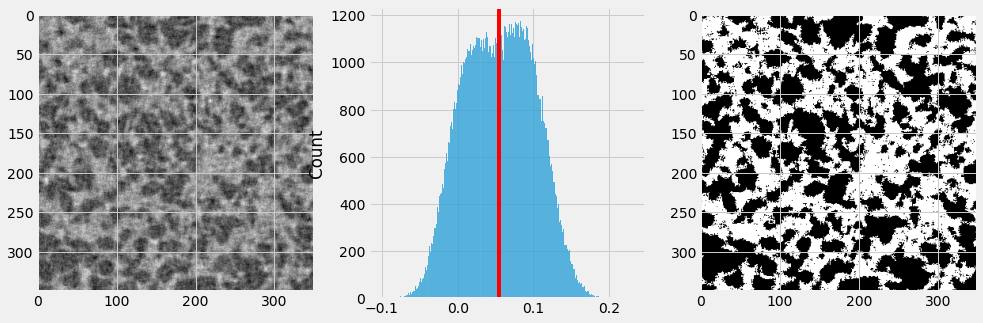

In [35]:
fig, axes = plt.subplots(ncols=3, figsize=(15,5))
axes[0].imshow(img2d, cmap='gray')

sns.histplot(img2d.ravel(), bins=256, ax=axes[1], kde=False)
axes[1].axvline(thresh, color='r')
axes[2].imshow(~clear_border(img2d_bin)img2d_bin, cmap='gray')


In [49]:
from scipy.ndimage import binary_closing
from skimage.morphology import disk

Text(0.5, 1.0, 'closing disk=3')

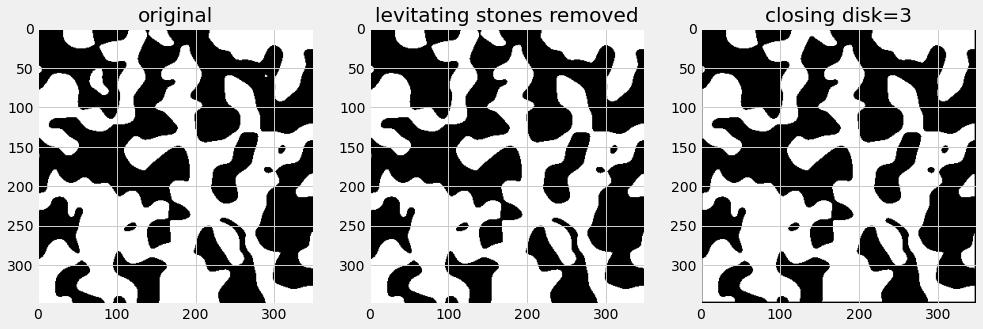

In [105]:
remove_leviating_volume = lambda img2d_bin: ~clear_border(img2d_bin)*img2d_bin

#img2d_bin = pg.gen_phantom(img2d_bin.shape, porosity, 10)
fig, axes = plt.subplots(ncols=3, figsize=(15,5))
axes[0].imshow(img2d_bin, cmap='gray')
axes[0].set_title("original")

img2d_bin_proc = remove_leviating_volume(img2d_bin)
axes[1].imshow(img2d_bin_proc, cmap='gray')
axes[1].set_title("levitating stones removed")

img2d_bin_proc = binary_closing(img2d_bin_proc, structure=disk(3))
axes[2].imshow(img2d_bin_proc, cmap='gray')
axes[2].set_title("closing disk=3")

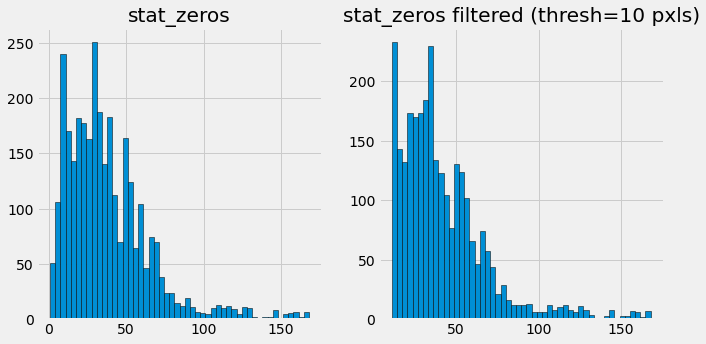

In [106]:

stat_zeros, _ = sc.get_row_statistics(img2d_bin, row_numbers="all", axis="both")

fig, axes = plt.subplots(ncols=2, figsize=(10,5))

axes[0].hist(stat_zeros, bins=50, edgecolor='k')
axes[0].set_title("stat_zeros")

thresh = 10
axes[1].hist(stat_zeros[stat_zeros>thresh], bins=50, edgecolor='k')
axes[1].set_title(f"stat_zeros filtered (thresh={thresh} pxls)")
None

In [107]:
stat_zeros = stat_zeros[stat_zeros>3]

In [108]:
MEAN_pore_row_length_img2d_bin = np.mean(stat_zeros)
MEAN_pore_row_length_img2d_bin

38.900390625

In [109]:
porosity = img2d_bin.sum() / img2d_bin.size
porosity

0.5119265306122449

In [110]:
cpl_predicted = get_characteristical_pore_length(porosity, MEAN_pore_row_length_img2d_bin, shape=[1000,1000])

In [111]:
cpl_predicted

10.351077547659319

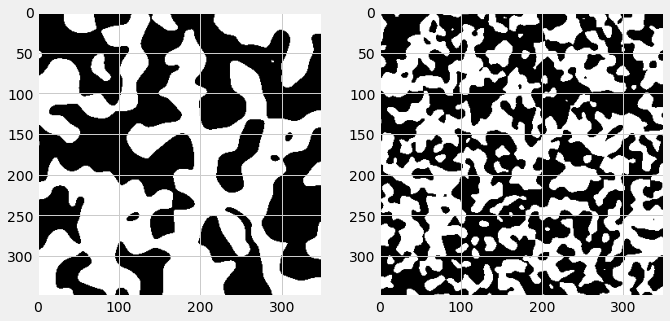

In [112]:
fig, axes = plt.subplots(ncols=2, figsize=(10,5))
axes[0].imshow(img2d_bin, cmap='gray')
axes[1].imshow(pg.gen_phantom(img2d_bin.shape, porosity, 4), cmap='gray')